# Setup environment

In [ ]:
import numpy as np
from numpy.linalg import inv
import math

import matplotlib.pyplot as plt
import seaborn as sns

import time

# Dataset

In [ ]:
def add_noise(arr, level):
  noise = np.random.normal(0, level/2, len(arr))
  
  plt.hist(noise)
  plt.show()

  arr = arr + noise
  
  return arr


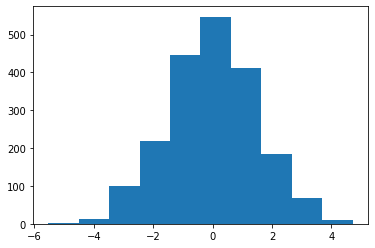

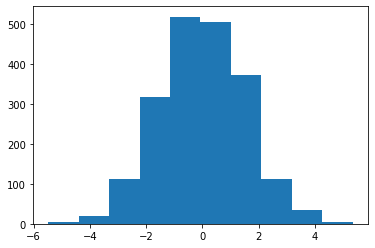

In [ ]:
# Create random input and output data
x1 = np.random.randint(0, 20, 2000)
x2 = np.random.randint(0, 20, 2000)

# Create output data
Y = (12 + (x1 * 3) + (x2 * 6)).T

# Add noise to x
x1 = add_noise(x1, 3)
x2 = add_noise(x2, 3)

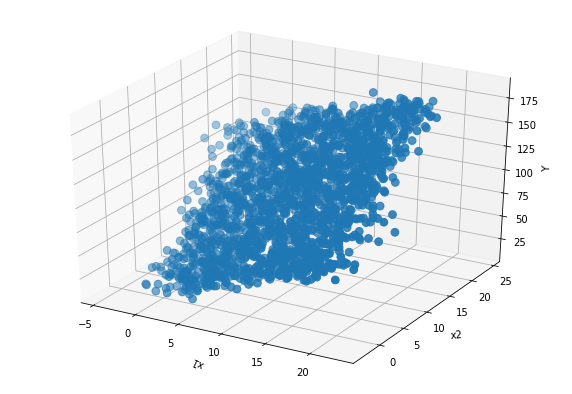

In [ ]:
# Create the instance
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, Y, s=60)

# axis: 'x', 'y' y 'z'
ax.set_xlabel('x1', fontsize=10, rotation=155)
ax.set_ylabel('x2', fontsize=10, rotation=5)
ax.set_zlabel(r'Y', fontsize=10, rotation=87)

plt.show()

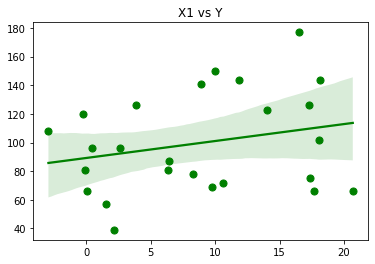

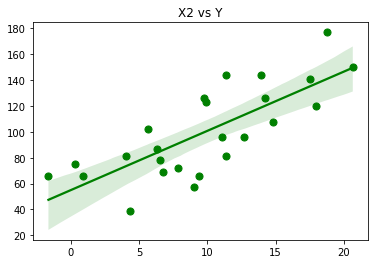

In [ ]:
# x1 vs y
sns.regplot(x=x1[:int(len(x1)/80)], y=Y[:int(len(Y)/80)], color='Green', x_estimator=np.mean)
plt.title("X1 vs Y")
plt.show()

# x2 vs y
sns.regplot(x=x2[:int(len(x2)/80)], y=Y[:int(len(Y)/80)], color='Green', x_estimator=np.mean)
plt.title("X2 vs Y")
plt.show()

In [ ]:
# Generate X matrix:
b = np.ones(2000)
X = np.stack([b, x1, x2]).T
X.shape

(2000, 3)

In [ ]:
def split_train_test(x, y, train_set=80):
  index = np.arange(len(y))
  np.random.shuffle(index)

  print(f'The train set will be the {train_set}% of the dataset')
  
  # Test:
  test_index = index[int(len(y)*.8):]
  try:
    x_test = x[test_index, :]
  except:
    x_test = x[test_index]
  y_test = y[test_index]

  # Train:
  train_index = index[:int(len(y)*.8)]
  try:
    x = x[train_index, :]
  except:
    x = x[train_index]

  y = y[train_index]

  print(f'The x train shape is: {x.shape} and y is: {y.shape}')
  print(f'The x test shape is: {x_test.shape} and y is: {y_test.shape}')

  return x, y, x_test, y_test

In [ ]:
X, Y, x_test, y_test = split_train_test(X, Y)

The train set will be the 80% of the dataset
The x train shape is: (1600, 3) and y is: (1600,)
The x test shape is: (400, 3) and y is: (400,)


# Models

### Linear Regression

Hypothesis:

We have some data modeled by the equation:

$$
y_i = \beta_{0} + \sum_{j=1}^{n} \beta_{j} \cdot X_{i,j} + \epsilon_{i}
$$


Which can be written as:

* Variables:
$$
X = \begin{bmatrix}
1 & x_{11} & x_{12}  & ... & x_{1n} \\
1 & x_{21} & x_{22}  & ... & x_{2n}\\
... & ... & ...  & ... & ...\\ 
1 & x_{n1} & x_{n2}  & ... & x_{3n}\\
\end{bmatrix}
$$

* Weights: 
$$
\beta = \begin{bmatrix}
\beta_{0} & \beta_{1} & \beta_{2} & \beta_{n}
\end{bmatrix}
$$


* Random error: 

$$
\epsilon = \begin{bmatrix}
\epsilon_{0} & \epsilon_{1} & \epsilon_{2} & \epsilon_{n}
\end{bmatrix}
$$

So that:

$$
H(\beta) = \beta^{T} \cdot X + \epsilon^{T} =  \beta_{0} + \beta_{1} \cdot  X_{1} + \beta_{2} \cdot  X_{2} + ... + \beta_{n} \cdot  X_{n}
$$

### 1. Solving with Least Squares

1. Residual sum of squares:

we have an error:

$$Y = X \hat{\beta} + \epsilon$$

$$e = X \hat{\beta} - Y$$

Clearing the variable $\beta$

$$
X\hat{\beta} = Y
$$

$$
X\hat{\beta}X^T = YX^T
$$

$$
\hat{\beta} = YX^T (XX^T)^I
$$

In [ ]:
# get the start time
st = time.time()
B = inv(X.T @ X) @ X.T @ Y
# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


print(f'Result: y = {B[0]} + {B[1]} x1 + {B[2]} x2')

Execution time: 0.003785848617553711 seconds
Result: y = 16.902340621133764 + 2.8403122662813267 x1 + 5.646815033501028 x2


### Error: 

#### Mean Squared Error(MSE)

$$
MSE = \frac{1}{n} \sum_{i=1}^{D}(y_i - \hat{y_i})^2
$$


#### Mean Absolute Error(MSE)

$$
MAE = \frac{1}{n} \sum_{i=1}^{D}y_i - \hat{y_i}
$$

In [ ]:
def get_mse(y, y_hat):
  mse = np.square(np.subtract(y,y_hat)).mean()
  print(f'The MSE is: {mse}')
  return mse

def get_mae(y, y_hat):
  mae = np.abs(np.subtract(y,y_hat)).mean()
  print(f'The MAE is: {mae}')
  return mae

In [ ]:
def evaluate(x_test, y_test, B):
  y_hat = np.sum(x_test * B, axis=1)
  get_mse(y_test, y_hat)
  get_mae(y_test, y_hat)

In [ ]:
# Evaluate LR with LS
evaluate(x_test, y_test, B)

The MSE is: 98.28064880500747
The MAE is: 8.045606205785612


### 2. Solving with Gradient Descent

1. Given the linear function:

$$
y_i = \beta_{0} + \sum_{j=1}^{n} \beta_{j} \cdot X_{i,j} + \epsilon_{i}
$$

And the error function:

$$ \epsilon = \sum_{j=1}^{n} (y_i - y)^2$$

We have the gradient given by:


To minimize:
$$
SGD = - \frac{\partial }{\partial \beta}(\epsilon(y_i(X, \beta))) *lr
$$

$$
SGD = - \frac{\partial }{\partial y_i}(\epsilon(y_i)) *  \frac{\partial }{\partial \beta}(y_i(X, \beta)) *lr
$$

Finally we have:

In [ ]:
B0 = np.random.randn()
B1 = np.random.randn()
B2 = np.random.randn()

learning_rate = 1e-6

st = time.time()

for t in range(5000):
    # Forward pass: compute predicted y
    # y = B0 + B1 x1 + B2 x2
    y_pred = B0*X[:, 0] + B1*X[:, 1] + + B2*X[:, 2]

    # Compute and print loss
    loss = np.square(y_pred - Y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - Y)
    grad_B0 = grad_y_pred.sum()
    grad_B1 = (grad_y_pred * X[:, 1]).sum()
    grad_B2 = (grad_y_pred * X[:, 2]).sum()

    # Update weights
    B0 -= learning_rate * grad_B0
    B1 -= learning_rate * grad_B1
    B2 -= learning_rate * grad_B2


# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

print(f'Result: y = {B0} + {B1} x1 + {B2} x2')

99 212837.2355438678
199 206905.70054546068
299 201557.90183520643
399 196736.39255418692
499 192389.3793237934
599 188470.16587343137
699 184936.65142215192
799 181750.878425724
899 178878.62483097933
999 176289.03645736523
1099 173954.29555669153
1199 171849.32199069156
1299 169951.50381640077
1399 168240.45438526102
1499 166697.79334667238
1599 165306.94920349994
1699 164052.98129855638
1799 162922.41931981308
1899 161903.11860028037
1999 160984.129658166
2099 160155.58057589357
2199 159408.57095447753
2299 158735.0763040969
2399 158127.861843818
2499 157580.4047844882
2599 157086.82425995253
2699 156641.81815390446
2799 156240.60614375398
2899 155878.8783496828
2999 155552.74903726636
3099 155258.71487632953
3199 154993.61730764672
3299 154754.60861322278
3399 154539.12132567778
3499 154344.84064812574
3599 154169.67958827812
3699 154011.75653965835
3799 153869.37506910163
3899 153741.00569341477
3999 153625.26944943718
4099 153520.92308101122
4199 153426.8456837371
4299 153342.026

In [ ]:
evaluate(x_test, y_test, np.array([B0, B1, B2]))

The MSE is: 98.26923064332703
The MAE is: 8.062465722016638


### Polynomial regression

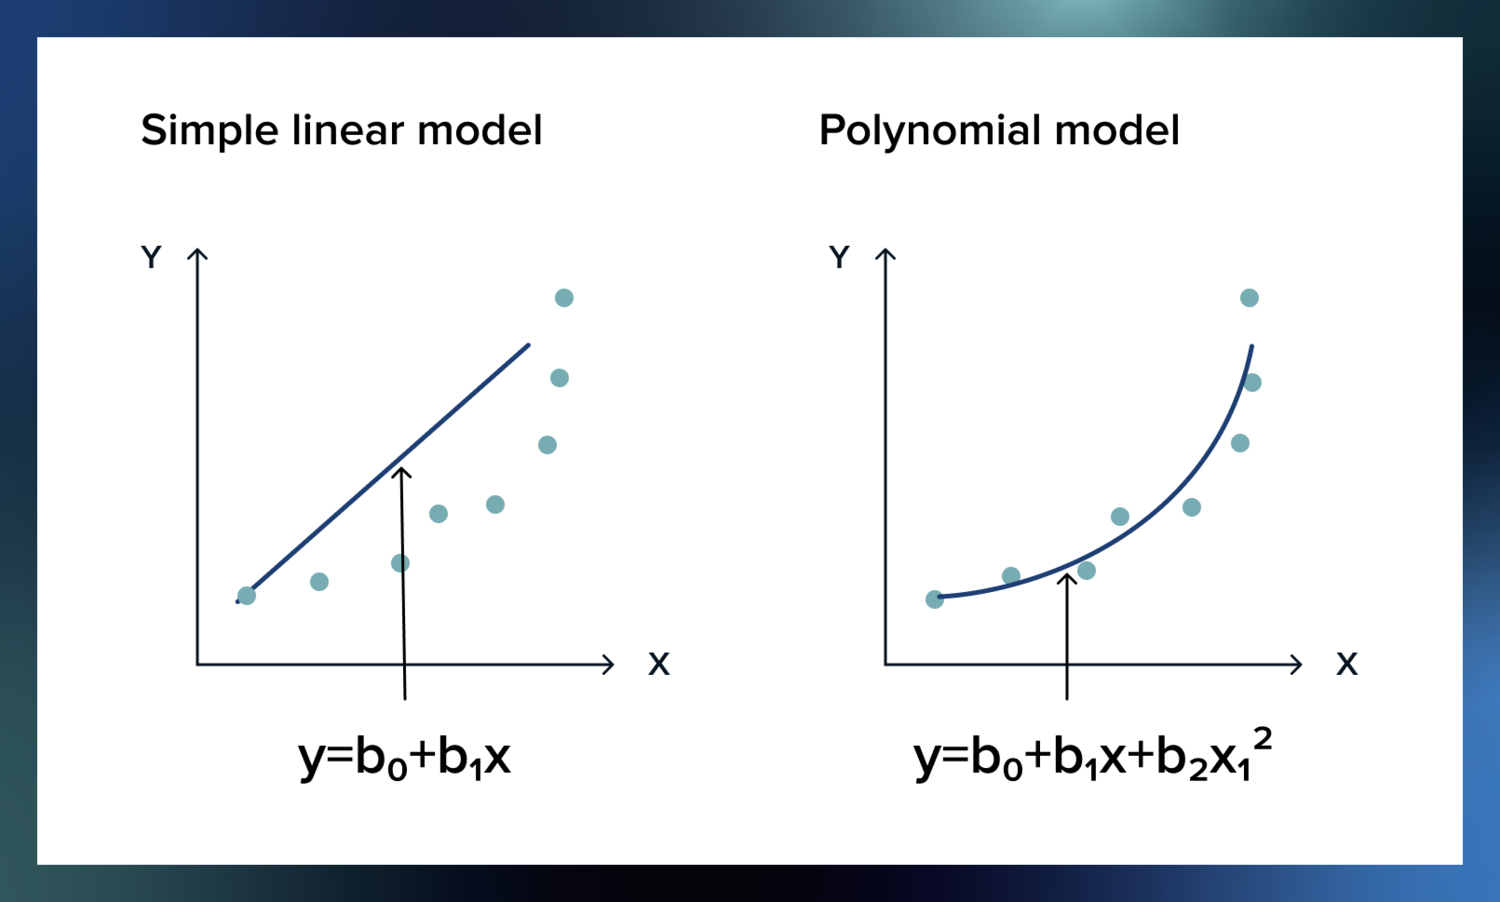


In [ ]:
B0 = np.random.randn()
B1 = np.random.randn()
B2 = np.random.randn()


learning_rate = 1e-8

st = time.time()

for t in range(20000):
    # Forward pass: compute predicted y
    # y = B0 + B1 x1 + B2 x2^2
    y_pred = B0 * X[:, 0] + B1 * X[:, 1] + + B2 * X[:, 2] ** 2

    # Compute and print loss
    loss = np.square(y_pred - Y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - Y)
    grad_B0 = grad_y_pred.sum()
    grad_B1 = (grad_y_pred * X[:, 1]).sum()
    grad_B2 = (grad_y_pred * X[:, 2] ** 2).sum()

    # Update weights
    B0 -= learning_rate * grad_B0
    B1 -= learning_rate * grad_B1
    B2 -= learning_rate * grad_B2


# get the end time
et = time.time()
# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

print(f'Result: y = {B0} + {B1} x1 + {B2} x2^2')

99 4035809.2531398023
199 2727069.2065466447
299 1940369.9849690786
399 1467382.9126110028
499 1182916.3028215389
599 1011738.2731838931
699 908639.4627219595
799 846452.0502031578
899 808849.9805326043
999 786022.3793959692
1099 772073.5630545752
1199 763460.6170575717
1299 758054.4849044862
1399 754575.7447422873
1499 752255.5486651039
1599 750631.8697712388
1699 749427.0601882043
1799 748474.2715846708
1899 747673.2387890897
1999 746963.7086836153
2099 746309.4727355725
2199 745688.7716102512
2299 745088.5289810137
2399 744500.8864324575
2499 743921.1211675445
2599 743346.3946879986
2699 742775.0008344005
2799 742205.913908269
2899 741638.5171234673
2999 741072.4394235471
3099 740507.4574198202
3199 739943.4364626559
3299 739380.2952292473
3399 738817.9844432126
3499 738256.474086489
3599 737695.7457145291
3699 737135.7878382461
3799 736576.5931488678
3899 736018.1568502573
3999 735460.475656749
4099 734903.5471909129
4199 734347.3696216505
4299 733791.9414467149
4399 733237.2613620

In [ ]:
evaluate(x_test, y_test, np.array([B0, B1, B2]))

The MSE is: 3068.468045088916
The MAE is: 46.04322284884351


## Sklearn

#### Create dataset

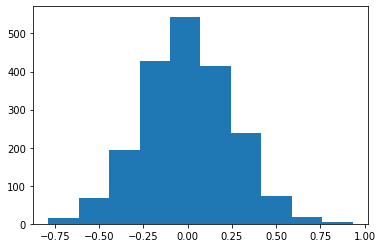

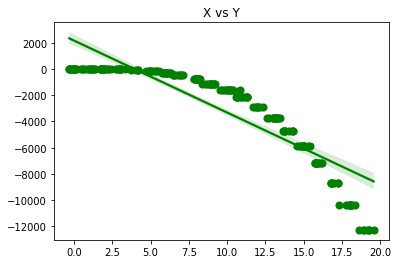

The train set will be the 80% of the dataset
The x train shape is: (1600,) and y is: (1600,)
The x test shape is: (400,) and y is: (400,)


In [ ]:
# Dataset:
# Create random input and output data
X = np.random.randint(0, 20, 2000)

# Create output data
Y = (12 + (4 * X ** 2) - (2 * X ** 3)).T
#Y = (12 + (X * 3)).T

# Add noise to x
X = add_noise(X, 0.5)
#X = add_noise(X, 3)

# X vs y
sns.regplot(x=X[:int(len(X)*.1)], y=Y[:int(len(Y)*.1)], color='Green', x_estimator=np.mean)
plt.title("X vs Y")
plt.show()

X, Y, x_test, y_test = split_train_test(X, Y)

X = np.expand_dims(X, axis=1)
Y = np.expand_dims(Y, axis=1)
x_test = np.expand_dims(x_test, axis=1)
y_test = np.expand_dims(y_test, axis=1)

#### Create models

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression:
# Train
linear_regression = LinearRegression().fit(X, Y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression:
poly_features = PolynomialFeatures(degree=2, include_bias=True)
poly_X = poly_features.fit_transform(X)

ploy_regression = LinearRegression().fit(poly_X, Y) 

#### Test

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def get_error(y, y_hat):
  mae = mean_absolute_error(y, y_hat)
  mse = mean_squared_error(y, y_hat)
  print(f'The MSE is: {mse}')
  print(f'The MSA is: {mae}')

# Linear Regression:
# Test:
y_hat = linear_regression.predict(x_test)
print('Linear Regression: ')
get_error(y_test, y_hat)

# Polynomial Regression:
poly_X_test = poly_features.fit_transform(x_test)
y_hat = ploy_regression.predict(poly_X_test)
print('Polynomial Regression: ')
get_error(y_test, y_hat)

Linear Regression: 
The MSE is: 2674499.5587635324
The MSA is: 1426.0564425654914
Polynomial Regression: 
The MSE is: 124502.13704238978
The MSA is: 286.8587981511497
